In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]

In [3]:
new_data = pd.DataFrame(data)
new_data[new_data[0] == 'дождь'][1].sum() / new_data[new_data[0] == 'дождь'][1].count()

0.3333333333333333

In [2]:
df = pd.read_csv('./data/airlines_task.csv')
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,400740,XE,3036,IAH,CHS,4.0,1195,131.0,0
1,194808,UA,315,DEN,ONT,7.0,707,145.0,0
2,526903,OO,6673,SFO,MRY,5.0,499,42.0,1
3,477937,WN,3668,PHX,ONT,2.0,810,70.0,1
4,48180,AS,623,LAS,PDX,5.0,985,143.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           400000 non-null  int64  
 1   Airline      399264 non-null  object 
 2   Flight       400000 non-null  int64  
 3   AirportFrom  400000 non-null  object 
 4   AirportTo    398843 non-null  object 
 5   DayOfWeek    399673 non-null  float64
 6   Time         400000 non-null  int64  
 7   Length       399517 non-null  float64
 8   Delay        400000 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 27.5+ MB


# Предобработка данных

Давайте закодируем функции и метки, чтобы лучше отображать данные и обучать модель.

In [4]:
df.nunique()

id             400000
Airline            18
Flight           6578
AirportFrom       293
AirportTo         293
DayOfWeek           7
Time             1129
Length            425
Delay               2
dtype: int64

Для столбцов `AirportFrom` и `AirportTo` буду использовать `OrdinalEncoder`, для `Airline` - `OneHotEncoder`.

In [5]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
df[['AirportFrom', 'AirportTo']] = enc.fit_transform(df[['AirportFrom', 'AirportTo']])

In [6]:
df.isna().sum()

id                0
Airline         736
Flight            0
AirportFrom       0
AirportTo      1157
DayOfWeek       327
Time              0
Length          483
Delay             0
dtype: int64

Я удалю все строчки с пропущенными значениями, потому что в худшем случае удалиться 2703 записи из 400000, следовательно на результаты они не повлияют. Да даже если не брать это в расчёт, нам всё равно пришлось бы их удалить, так как большая часть всех пропущенных значений являются категориальными признаками.

In [7]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [8]:
df.shape

(397307, 9)

In [9]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
df_enc = pd.DataFrame(enc.fit_transform(df[['Airline']]).toarray(), columns=df['Airline'].unique())
df_enc

,XE,UA,OO,WN,AS,FL,AA,CO,DL,9E,MQ,YV,US,EV,B6,OH,HA,F9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397302,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
397305,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
new_df = df.join(df_enc)

In [11]:
new_df.drop(['Airline'], axis=1, inplace=True)

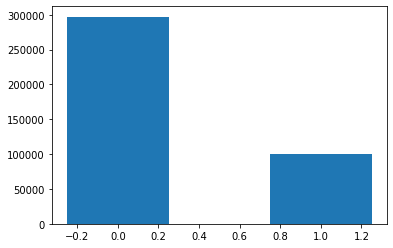

In [12]:
belay_bar = new_df.groupby(['Delay'])['Delay'].count()
plt.bar(belay_bar.index, belay_bar.values, width=0.5)
plt.show()

Присутствует явный дисбаланс среди этих двух классов. Необходимо провести балансировку.

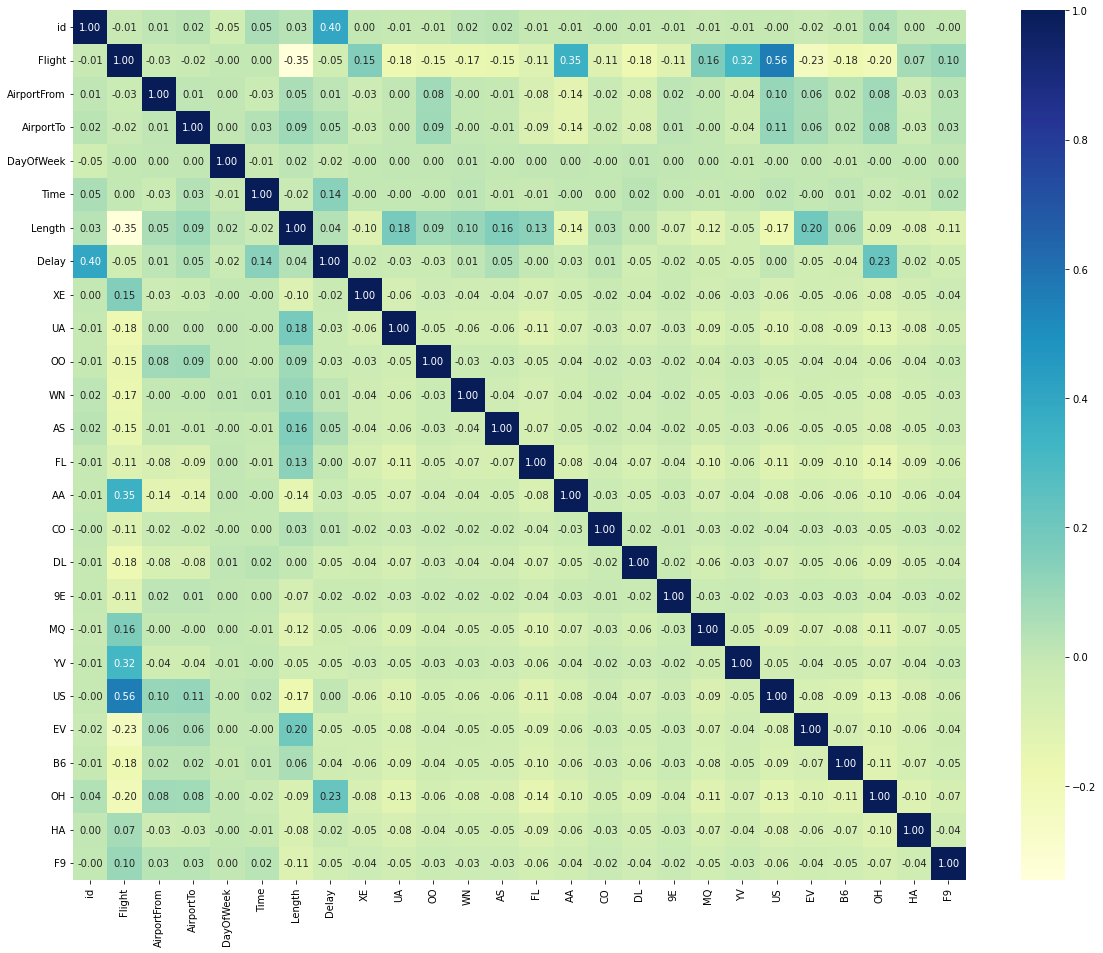

In [13]:
plt.figure(figsize=(20,16))
sns.heatmap(new_df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.show()

# Построение модели

In [14]:
from sklearn.preprocessing import StandardScaler
X = new_df.drop(['Delay'], axis=1)
scaler = StandardScaler()
scaler_x = scaler.fit_transform(X)
y = new_df['Delay']

In [20]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
new_X, new_y = nm.fit_resample(scaler_x, y.ravel())

После балансировки теперь можно приступать к обучению моделей.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

In [22]:
from sklearn.metrics import f1_score, cohen_kappa_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

### KNN

In [73]:
param = {'n_neighbors' : np.arange(1, 1100, 100)}

In [74]:
knn_optimal = RandomizedSearchCV(KNeighborsClassifier(), param).fit(X_train, y_train)

In [75]:
knn_optimal.best_params_

{'n_neighbors': 101}

In [76]:
y_pred = knn_optimal.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def metrics(y_test, y_pred, X, clf):
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred))
    print('Recall: ', recall_score(y_test, y_pred))
    print('F1: ', f1_score(y_test, y_pred))
    print('Roc: ', roc_auc_score(y_test, clf.predict_proba(X)[:, 1]))

In [79]:
metrics(y_test, y_pred, X_test, knn_optimal)

Accuracy:  0.6558563053511288
Precision:  0.6774593164029507
Recall:  0.5986167777888347
F1:  0.6356023984996171
Roc:  0.7176240596292057


### Gaussian

In [80]:
from sklearn.naive_bayes import GaussianNB

clf_gaus = GaussianNB().fit(X_train, y_train)
y_pred = clf_gaus.predict(X_test)

In [81]:
metrics(y_test, y_pred, X_test, clf)

Accuracy:  0.6021204939503555
Precision:  0.598219781260357
Recall:  0.6286695193551597
F1:  0.6130667895873262
Roc:  0.642215656417093


### LogisticRegression

In [82]:
from sklearn.linear_model import LogisticRegression

param = {'C' : [0.01, 0.1, 1, 10, 100], 'max_iter' : np.arange(100, 1100, 100)}

clf_log = RandomizedSearchCV(LogisticRegression(random_state=42), param).fit(X_train, y_train)

In [83]:
clf_log.best_params_

{'max_iter': 900, 'C': 0.1}

In [84]:
y_pred = clf_log.predict(X_test)
metrics(y_test, y_pred, X_test, clf_log)

Accuracy:  0.6333291755020581
Precision:  0.6447721179624665
Recall:  0.5983182406209573
F1:  0.6206771962423866
Roc:  0.6859697284675979


### SVC

In [33]:
from sklearn.svm import SVC

In [34]:
svc = SVC().fit(X_train, y_train)

In [35]:
y_pred = svc.predict(X_test)
metrics(y_test, y_pred, X_test, svc)

Accuracy:  0.64924535362355
Precision:  0.6809084372003835
Recall:  0.5653796397651507
F1:  0.6177893763931931


AttributeError: predict_proba is not available when  probability=False

### Итоговая модель классификаторов.

In [85]:
from sklearn.metrics import classification_report
classifiers = {
    'LogisticRegression': clf_log,
    'KNN classifier': knn_optimal,
    'SVC': svc,
    'GaussianNB': clf_gaus
}

In [86]:
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))

Accuracy (train) for LogisticRegression: 63.3% 
              precision    recall  f1-score   support

           0       0.62      0.67      0.65     19987
           1       0.64      0.60      0.62     20098

    accuracy                           0.63     40085
   macro avg       0.63      0.63      0.63     40085
weighted avg       0.63      0.63      0.63     40085

Accuracy (train) for KNN classifier: 65.6% 
              precision    recall  f1-score   support

           0       0.64      0.71      0.67     19987
           1       0.68      0.60      0.64     20098

    accuracy                           0.66     40085
   macro avg       0.66      0.66      0.65     40085
weighted avg       0.66      0.66      0.65     40085

Accuracy (train) for SVC: 64.9% 
              precision    recall  f1-score   support

           0       0.63      0.73      0.68     19987
           1       0.68      0.57      0.62     20098

    accuracy                           0.65     40085
   

### Реализация метрик ручками.

In [80]:
def metrics(y_test, y_pred):
    tp, fp, fn, tn = 0, 0, 0, 0
    for i in range(y_test.shape[0]):
        if y_pred[i] == 0 and y_test[i] == 0:
            tp += 1
        elif y_pred[i] == 1 and y_test[i] == 1:
            tn += 1
        elif y_pred[i] == 1 and y_test[i] == 0:
            fn += 1
        elif y_pred[i] == 0 and y_test[i] == 1:
            fp += 1
    p = tp + fn
    n = tn + fp
    accuracy = (tp + tn) / (p + n)
    precision =  tp / (tp + fp)
    recall = tp / p
    f1 = 2 / (1 / precision + 1 / recall)
    print(tp, fp, fn, tn)
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)

In [56]:
metrics(y_test, y_pred)

14662 8735 5325 11363
Accuracy:  0.64924535362355
Precision:  0.6266615378039919
Recall:  0.7335768249362086
F1:  0.6759173888991333


In [42]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test, y_pred)

array([[14662,  5325],
       [ 8735, 11363]], dtype=int64)

### Реализация метода ближайших соседей ручками.

In [63]:
def all_distances_point(x_train, point): # расстояние между каждой точки до нужной
    distances = np.sqrt(np.sum(np.power((x_train - point), 2), axis=1))
    return distances

def nearest_neighbor_method(x_train, y_train, x_test, k = 5): # непосредственно метод ближайщих соседей
    y_pred = np.array([])
    for i in x_test:
        distance = all_distances_point(x_train, i)
        dist_argsort = np.argsort(distance)
        unique, counts = np.unique(y_train[dist_argsort[:k]], return_counts=True) # подсчитываем количество уникальных соседей с выбором k ближайших
        count_neighbours = np.column_stack((unique, counts))
        index = np.random.choice(np.where(count_neighbours[:, 1] == np.max(count_neighbours[:, 1]))[0]) # выбираем случайного соседа из наиболее повторяющийся
        pred_class = count_neighbours[index, 0]
        y_pred = np.append(y_pred, pred_class)
    return y_pred

In [68]:
y_pred = nearest_neighbor_method(X_train[:40000], y_train[:40000], X_test[:10000])

In [72]:
metrics(y_test[:10000], y_pred)

3111 1967 1854 3068
Accuracy:  0.6179
Precision:  0.6126427727451753
Recall:  0.6265861027190333
F1:  0.6195359952205517


## Реализация метода опорных векторов ручками

In [69]:
class SVM:
    def __init__(self, etha=0.01, alpha=0.1, epochs=3):
        self.epochs = epochs
        self.etha = etha
        self.alpha = alpha
        self.w = None
        self.history_w = []
        self.errors = []
        self.history_loss = []
        
    def fit(self, X_train, y_train):
        self.w = np.random.normal(loc=0, scale=0.05, size=X_train.shape[1])
        self.history_w.append(self.w)
        
        for epoch in range(self.epochs):
            err = 0
            loss_i = 0
            for i, x in enumerate(X_train):
                pred = y_train[i] * np.dot(X_train[i], self.w)
                if pred > 1:
                    self.w -= self.alpha * self.etha * self.w / self.epochs
                else:
                    self.w += self.etha * (y_train[i] * x - self.alpha * self.w / self.epochs)
                loss_i += self.loss(X_train[i], y_train[i])
                self.history_w.append(self.w)
                self.history_loss.append(loss_i)
            print('epoch {}, loss={}'.format(epoch, loss_i)) 
                
    def predict(self, X_test):
        return np.sign(np.dot(X_test, self.w))
                
    def loss(self, x, y):
        return max(0, 1 - y * np.dot(x, self.w)) + self.alpha * np.dot(self.w, self.w) / 2

In [16]:
y = (y > 0).astype(int)*2-1

In [17]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
new_X, new_y = nm.fit_resample(scaler_x, y.ravel())

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

In [77]:
svm = SVM()
svm.fit(X_train, y_train)

epoch 0, loss=116511.11827084195
epoch 1, loss=116500.62564038119
epoch 2, loss=116500.63791052724


In [78]:
y_pred = svm.predict(X_test)
y_pred

array([-1.,  1., -1., ...,  1., -1.,  1.])

In [83]:
metrics(y_test, y_pred, X_test, svm)

Accuracy:  0.5699638268679057
Precision:  0.5615424341538992
Recall:  0.6492188277440541
F1:  0.6022061199058476


AttributeError: 'SVM' object has no attribute 'predict_proba'